#### IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

#### IMPORTAÇÃO DOS DADOS

In [2]:
MoS2_amonio = pd.read_csv("MoS2_amonio.txt", sep=',', engine='python', header=2)
MoS2_sodio = pd.read_csv("MoS2_sodio.txt", sep=',', engine='python', header=2)
MoS2_UP = pd.read_csv("MoS2_UP.txt", sep=',', engine='python', header=2)

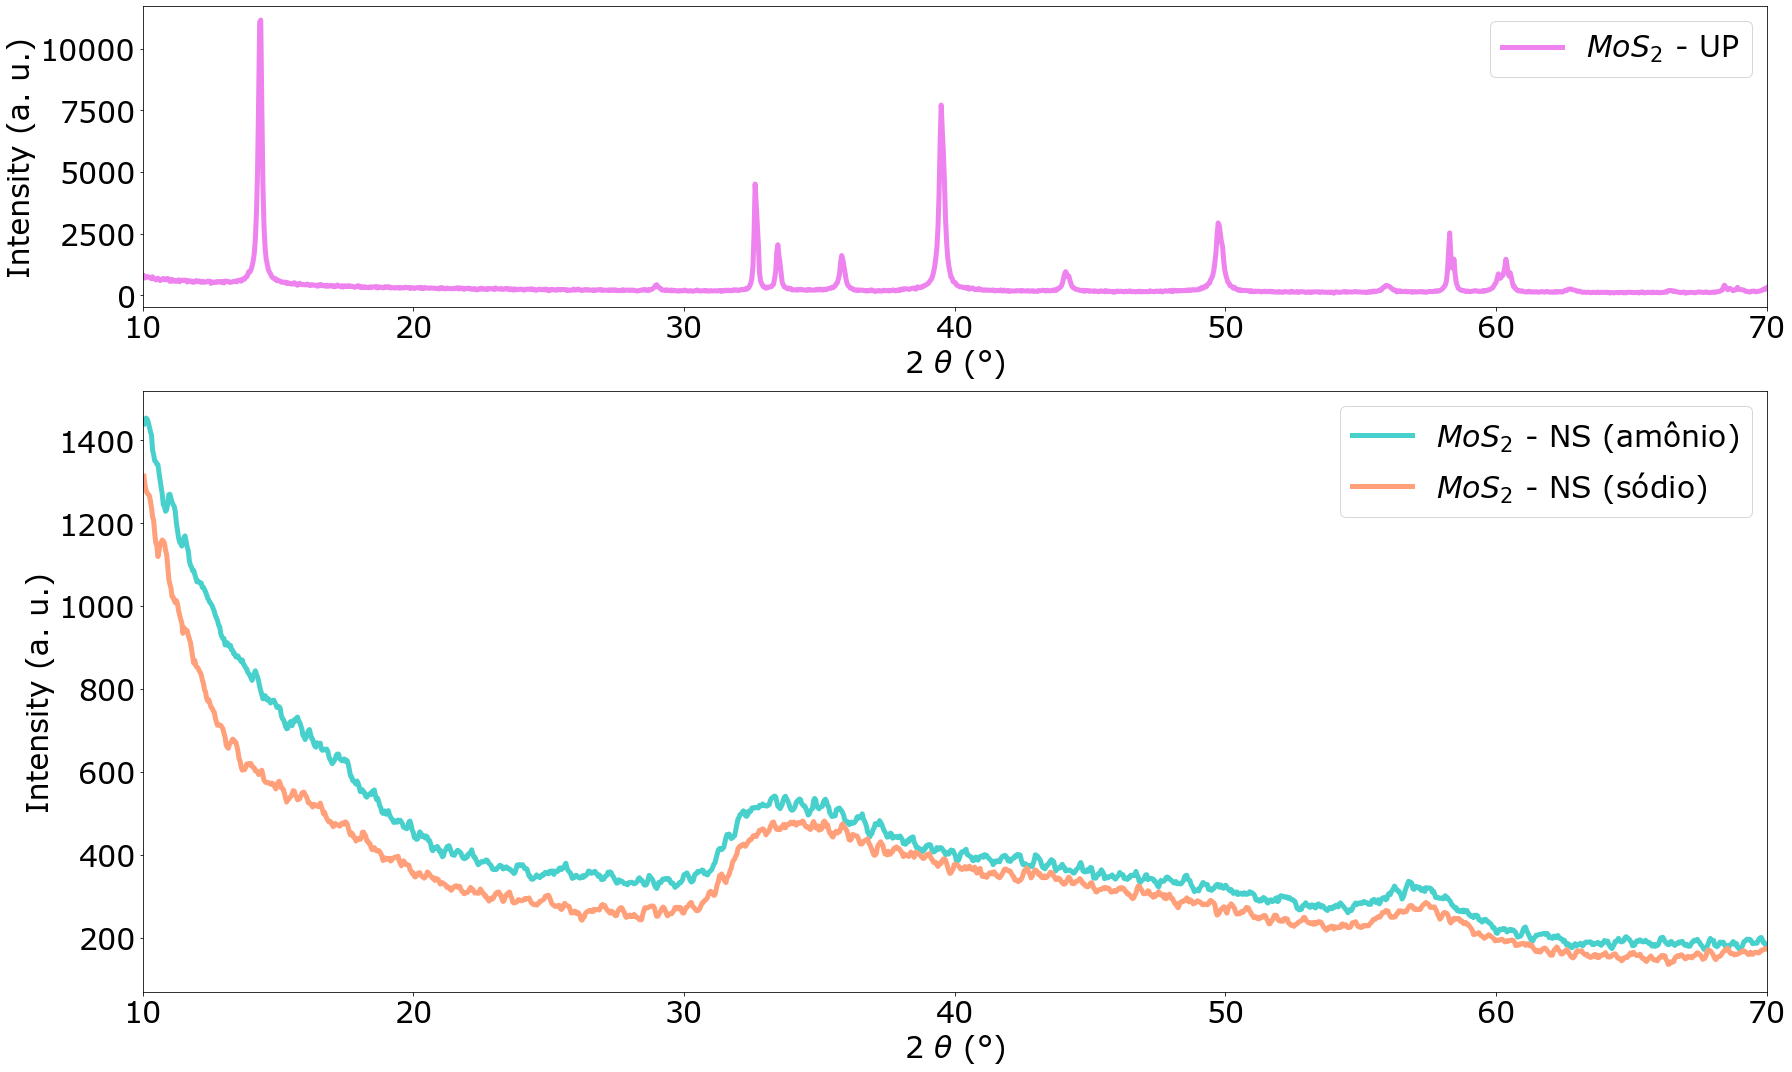

In [3]:
# Parâmetros da suavização
window_size = 11  # Tamanho da janela para suavização (deve ser ímpar)
poly_order = 3    # Ordem do polinômio para o filtro Savitzky-Golay

# Suavizar os dados
smooth_amonio = savgol_filter(MoS2_amonio.iloc[:, 1], window_length=window_size, polyorder=poly_order)
smooth_sodio = savgol_filter(MoS2_sodio.iloc[:, 1], window_length=window_size, polyorder=poly_order)

# Configurações do gráfico
plt.rcParams['font.family'] = 'Verdana'

# Criar os subplots
fig, axs = plt.subplots(2, 1, figsize=(25, 15), gridspec_kw={'height_ratios': [1, 2]})

# Primeiro subplot: MoS2_UP
axs[0].plot(MoS2_UP.iloc[:, 0], MoS2_UP.iloc[:, 1], label=r'$MoS_2$ - UP', linewidth=5, linestyle='-', color='violet')
axs[0].set_xlabel(r'2 $\theta$ (°)', size=30)
axs[0].set_ylabel('Intensity (a. u.)', size=30)
axs[0].tick_params(labelsize=30)
axs[0].set_xlim(10, 70)  # Delimitando o eixo x
axs[0].legend(fontsize=30)

# Segundo subplot: MoS2_amonio e MoS2_sodio
axs[1].plot(MoS2_amonio.iloc[:, 0], smooth_amonio, label=r'$MoS_2$ - NS (amônio)', linewidth=5, linestyle='-', color='mediumturquoise')
axs[1].plot(MoS2_sodio.iloc[:, 0], smooth_sodio, label=r'$MoS_2$ - NS (sódio)', linewidth=5, linestyle='-', color='lightsalmon')
axs[1].set_xlabel(r'2 $\theta$ (°)', size=30)
axs[1].set_ylabel('Intensity (a. u.)', size=30)
axs[1].tick_params(labelsize=30)
axs[1].set_xlim(10, 70)  # Delimitando o eixo x
axs[1].legend(fontsize=30)

# Ajustes de layout
plt.tight_layout()

# Salvando e exibindo
plt.savefig('DRX.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()